## 清理訓練數據集

In [1]:
import pandas
train_data_url = 'https://raw.githubusercontent.com/ywchiu/HKPC/master/data/pdm_train.csv'
df_train = pandas.read_csv(train_data_url)

In [2]:
len(df_train)

20631

In [3]:
df_train.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd12,sd13,sd14,sd15,sd16,sd17,sd18,sd19,sd20,sd21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.438406,0.035355,5.041671,0.008697,0.0,0.000000,0.0,0.0,0.042426,0.003253
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.404475,0.026458,3.717450,0.007640,0.0,1.154701,0.0,0.0,0.055076,0.044573
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.495950,0.029439,3.050906,0.028117,0.0,1.000000,0.0,0.0,0.076322,0.037977
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0.432574,0.025884,2.651326,0.025953,0.0,1.095445,0.0,0.0,0.073621,0.033498


In [4]:
df_train.columns

Index(['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
       's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
       's15', 's16', 's17', 's18', 's19', 's20', 's21', 'last_cycle', 'ttf',
       'label_bnc', 'label_mcc', 'av1', 'av2', 'av3', 'av4', 'av5', 'av6',
       'av7', 'av8', 'av9', 'av10', 'av11', 'av12', 'av13', 'av14', 'av15',
       'av16', 'av17', 'av18', 'av19', 'av20', 'av21', 'sd1', 'sd2', 'sd3',
       'sd4', 'sd5', 'sd6', 'sd7', 'sd8', 'sd9', 'sd10', 'sd11', 'sd12',
       'sd13', 'sd14', 'sd15', 'sd16', 'sd17', 'sd18', 'sd19', 'sd20', 'sd21'],
      dtype='object')

## 簡單線性迴歸

In [5]:
# 準備 x,y
features = ['setting1','setting2','setting3','s1','s2','s3',
            's4','s5','s6','s7','s8','s9','s10','s11','s12',
            's13','s14','s15','s16','s17','s18','s19','s20','s21']

train_X = df_train[features]
train_y = df_train['ttf']

# 建立模型
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(train_X,train_y)

LinearRegression()

In [6]:
# 讀取測試數據集
test_data_url = 'https://raw.githubusercontent.com/ywchiu/HKPC/master/data/pdm_test.csv'
df_test = pandas.read_csv(test_data_url)

In [8]:
# 產生 X,y
test_X = df_test[features]
test_y = df_test['ttf']

# 產生預測結果
pred_y = clf.predict(test_X)

# 評估預測結果
from sklearn.metrics import mean_squared_error
mean_squared_error(test_y, pred_y)

# 產生 R2
from sklearn.metrics import r2_score
r2_score(test_y, pred_y)

0.4054954961206241

## 簡單線性迴歸 v.s. 迴歸樹

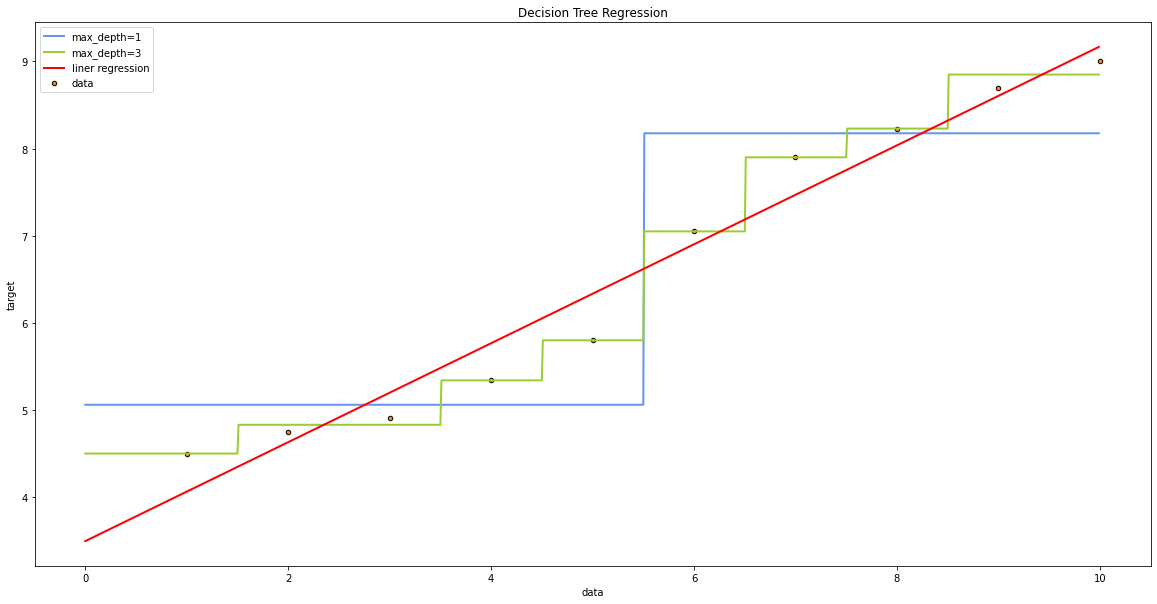

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model

# Data set
x = np.array(list(range(1, 11))).reshape(-1, 1)
y = np.array([4.50, 4.75, 4.91, 5.34, 5.80, 7.05, 7.90, 8.23, 8.70, 9.00]).ravel()

# Fit regression model
model1 = DecisionTreeRegressor(max_depth=1)
model2 = DecisionTreeRegressor(max_depth=3)
model3 = linear_model.LinearRegression()
model1.fit(x, y)
model2.fit(x, y)
model3.fit(x, y)

# Predict
X_test = np.arange(0.0, 10.0, 0.01)[:, np.newaxis]
y_1 = model1.predict(X_test)
y_2 = model2.predict(X_test)
y_3 = model3.predict(X_test)

# Plot the results
plt.figure(figsize = [20,10])
plt.scatter(x, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=1", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=3", linewidth=2)
plt.plot(X_test, y_3, color='red', label='liner regression', linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## 建立迴歸樹

In [10]:
# 建立迴歸樹
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_depth=7)
clf.fit(train_X,train_y)

# 產生預測結果
pred_y = clf.predict(test_X)

# 產生 R2
from sklearn.metrics import r2_score
r2_score(test_y, pred_y)


0.4034804909704117

In [11]:
import graphviz
from sklearn.tree import export_graphviz
export_graphviz(clf, "tree.dot")
#! cat tree.dot

## RFECV

In [12]:
# 將數據做kfold
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, random_state=10)

# 運用 RFECV 篩選特徵
from sklearn.feature_selection import RFECV
clf = DecisionTreeRegressor(max_depth=7)
rfecv = RFECV(estimator=clf, step=1, cv=kfold, scoring='r2')
rfecv.fit(train_X, train_y)
rfecv.n_features_

# 最佳特徵
sel_features = [f for f,s in zip(train_X.columns, rfecv.support_) if s]
sel_features


/Users/davidchiu/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


['s4', 's7', 's9', 's11', 's12']

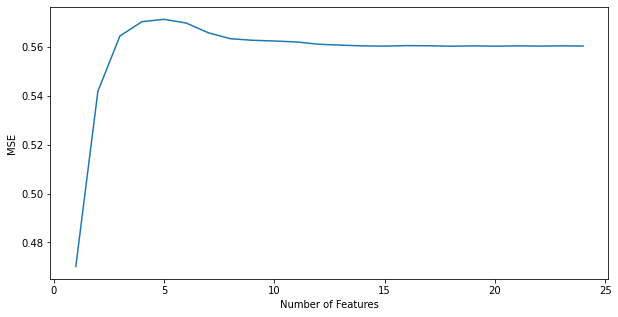

In [13]:
from matplotlib import pyplot as plt
plt.figure(figsize=[10,5])
plt.xlabel("Number of Features")
plt.ylabel("MSE")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [14]:
# 產生預測結果
pred_y = rfecv.predict(test_X)

# 產生 R2
from sklearn.metrics import r2_score
r2_score(test_y, pred_y)

0.3221909787862586

## 隨機森林

In [15]:
# 建立隨機森林
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_features=3, max_depth=4, random_state=1) 
rf.fit(train_X, train_y)

# 產生預測結果
pred_y = rf.predict(test_X)
r2_score(test_y, pred_y)

0.5251984119830091

([<matplotlib.axis.XTick at 0x1272cc0b8>,
 [Text(0, 0, 'setting1'),
  Text(0, 0, 'setting2'),
  Text(0, 0, 'setting3'),
  Text(0, 0, 's1'),
  Text(0, 0, 's2'),
  Text(0, 0, 's3'),
  Text(0, 0, 's4'),
  Text(0, 0, 's5'),
  Text(0, 0, 's6'),
  Text(0, 0, 's7'),
  Text(0, 0, 's8'),
  Text(0, 0, 's9'),
  Text(0, 0, 's10'),
  Text(0, 0, 's11'),
  Text(0, 0, 's12'),
  Text(0, 0, 's13'),
  Text(0, 0, 's14'),
  Text(0, 0, 's15'),
  Text(0, 0, 's16'),
  Text(0, 0, 's17'),
  Text(0, 0, 's18'),
  Text(0, 0, 's19'),
  Text(0, 0, 's20'),
  Text(0, 0, 's21')])

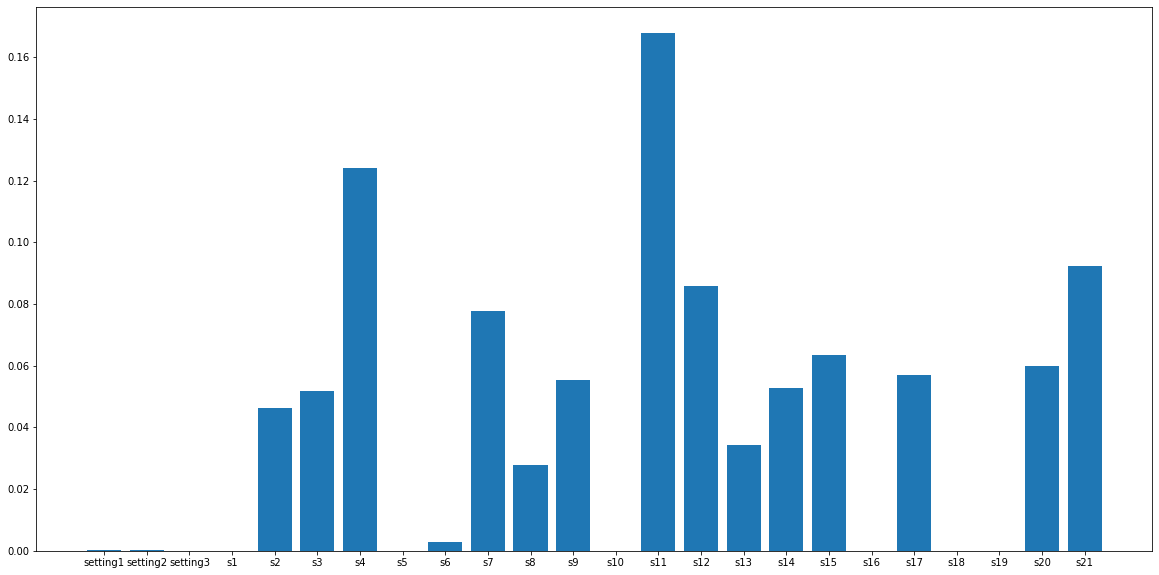

In [16]:
plt.figure(figsize=  [20,10])
plt.bar(range(len(rf.feature_importances_)),rf.feature_importances_)
plt.xticks(range(len(rf.feature_importances_)),list(train_X.columns))

In [17]:
# 產生預測結果
from sklearn.metrics import mean_squared_error
pred_y = rf.predict(test_X)
mean_squared_error(test_y, pred_y) ** 0.5


28.634252712062626